# Import libraries

In [1]:
pip install gunicorn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import gunicorn


# Print version of libraries

In [3]:
print("pandas version is",pd.__version__)
print("numpy version is",np.__version__)
print("matplotlib version is", matplotlib.__version__)
print("seaborn version is",sns.__version__)
print("gunicorn version is",gunicorn.__version__)

pandas version is 2.2.1
numpy version is 1.26.4
matplotlib version is 3.8.3
seaborn version is 0.13.2
gunicorn version is 22.0.0


# Load the data

In [4]:
dt=pd.read_csv(r"C:\Users\DELL\RenderDUMMY\loans.csv")

In [5]:
dt

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested,Default
0,10,32,82133,689,1,10789,No
1,38,30,53172,588,3,5442,Yes
2,6,31,90000,573,4,5000,Yes
3,15,29,74634,621,7,16074,Yes
4,35,36,78232,701,5,17742,No
...,...,...,...,...,...,...,...
4995,28,27,75641,634,4,5000,Yes
4996,36,27,63483,571,1,5000,Yes
4997,34,48,88626,722,10,25850,No
4998,28,36,90000,644,13,14923,No


In [6]:
dt.columns

Index(['Applicant_ID', 'Age', 'Annual_Income', 'Credit_Score',
       'Employment_Years', 'Loan_Amount_Requested', 'Default'],
      dtype='object')

In [7]:
dt.head()

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested,Default
0,10,32,82133,689,1,10789,No
1,38,30,53172,588,3,5442,Yes
2,6,31,90000,573,4,5000,Yes
3,15,29,74634,621,7,16074,Yes
4,35,36,78232,701,5,17742,No


In [8]:
dt.tail()

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested,Default
4995,28,27,75641,634,4,5000,Yes
4996,36,27,63483,571,1,5000,Yes
4997,34,48,88626,722,10,25850,No
4998,28,36,90000,644,13,14923,No
4999,35,24,43888,608,3,5000,Yes


In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Applicant_ID           5000 non-null   int64 
 1   Age                    5000 non-null   int64 
 2   Annual_Income          5000 non-null   int64 
 3   Credit_Score           5000 non-null   int64 
 4   Employment_Years       5000 non-null   int64 
 5   Loan_Amount_Requested  5000 non-null   int64 
 6   Default                5000 non-null   object
dtypes: int64(6), object(1)
memory usage: 273.6+ KB


In [10]:
dt.dtypes

Applicant_ID              int64
Age                       int64
Annual_Income             int64
Credit_Score              int64
Employment_Years          int64
Loan_Amount_Requested     int64
Default                  object
dtype: object

In [11]:
dt.describe()

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,23.043600,32.903600,77313.455400,637.695400,7.285800,12437.020200
std,12.757611,8.197984,13922.930681,55.946283,4.691409,6207.884554
min,1.000000,21.000000,28000.000000,560.000000,1.000000,5000.000000
25%,11.000000,26.000000,67377.000000,586.000000,3.000000,6641.500000
50%,26.000000,31.000000,81886.500000,625.000000,6.000000,11681.500000
75%,34.000000,40.000000,90000.000000,695.000000,11.000000,17079.250000
max,46.000000,48.000000,90000.000000,740.000000,16.000000,29000.000000


In [12]:
dt.shape

(5000, 7)

In [13]:
dt['Default'].value_counts()

Default
No     2702
Yes    2298
Name: count, dtype: int64

In [14]:
dt.nunique()

Applicant_ID               46
Age                        28
Annual_Income            3206
Credit_Score              181
Employment_Years           16
Loan_Amount_Requested    3686
Default                     2
dtype: int64

In [15]:
dt.isnull().sum()

Applicant_ID             0
Age                      0
Annual_Income            0
Credit_Score             0
Employment_Years         0
Loan_Amount_Requested    0
Default                  0
dtype: int64

In [16]:
dt=dt.replace({'Yes':1,'No':0})

C:\Users\DELL\AppData\Local\Temp\ipykernel_24608\1170395482.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt=dt.replace({'Yes':1,'No':0})


In [17]:
dt

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested,Default
0,10,32,82133,689,1,10789,0
1,38,30,53172,588,3,5442,1
2,6,31,90000,573,4,5000,1
3,15,29,74634,621,7,16074,1
4,35,36,78232,701,5,17742,0
...,...,...,...,...,...,...,...
4995,28,27,75641,634,4,5000,1
4996,36,27,63483,571,1,5000,1
4997,34,48,88626,722,10,25850,0
4998,28,36,90000,644,13,14923,0


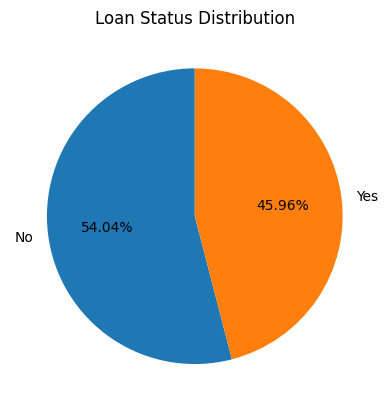

In [18]:
loan_status_counts=dt['Default'].value_counts()
labels=["No","Yes"]
plt.pie(loan_status_counts,autopct='%.2f%%', labels=labels,startangle=90)
plt.title("Loan Status Distribution")
plt.show()

array([[<Axes: title={'center': 'Applicant_ID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>],
       [<Axes: title={'center': 'Credit_Score'}>,
        <Axes: title={'center': 'Employment_Years'}>,
        <Axes: title={'center': 'Loan_Amount_Requested'}>],
       [<Axes: title={'center': 'Default'}>, <Axes: >, <Axes: >]],
      dtype=object)

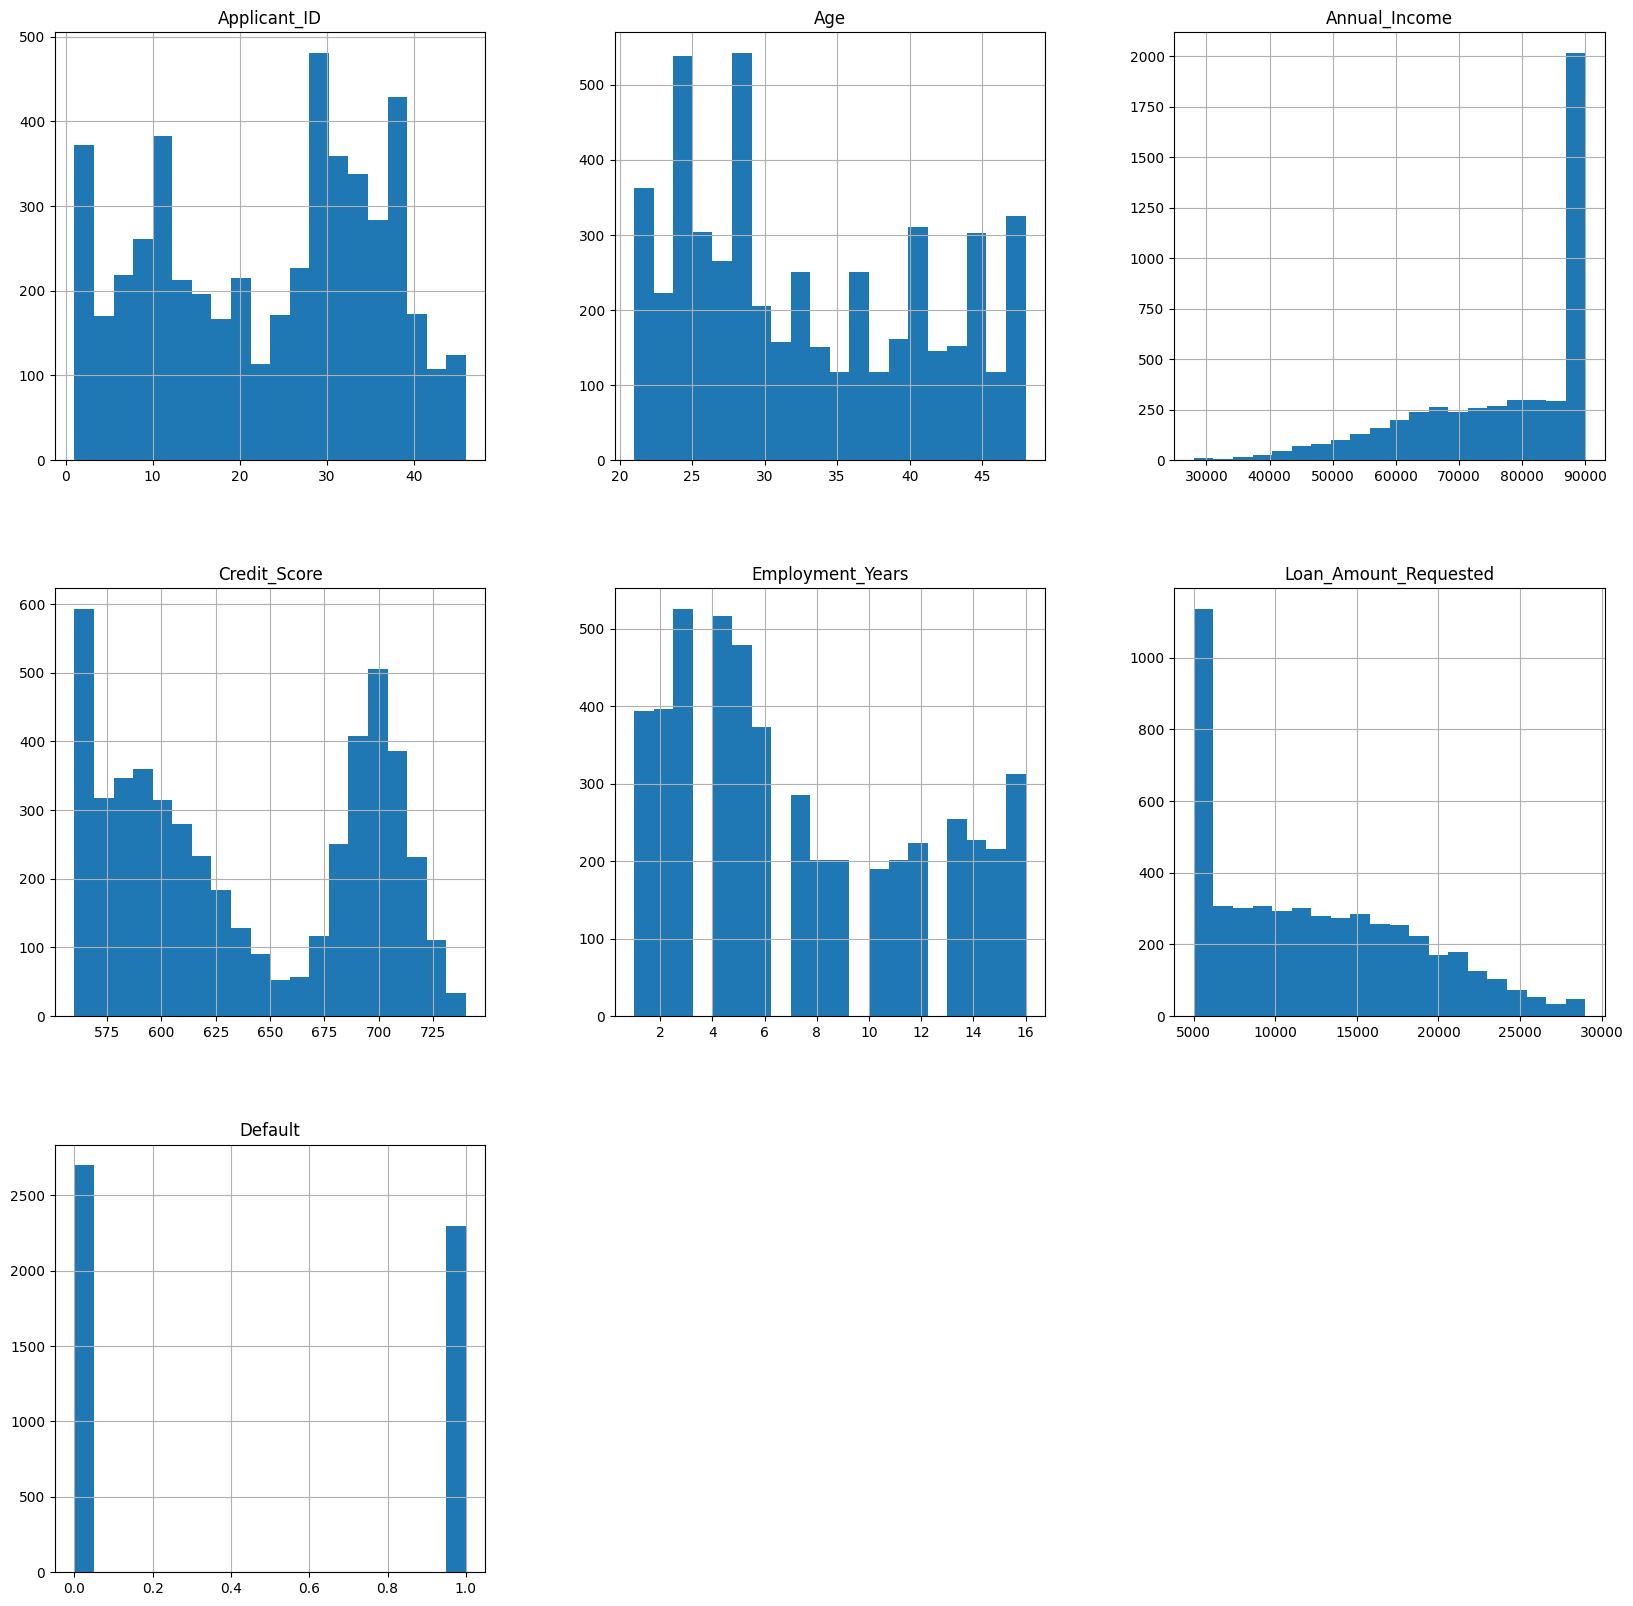

In [19]:
dt.hist(figsize=(20,20),bins=20)

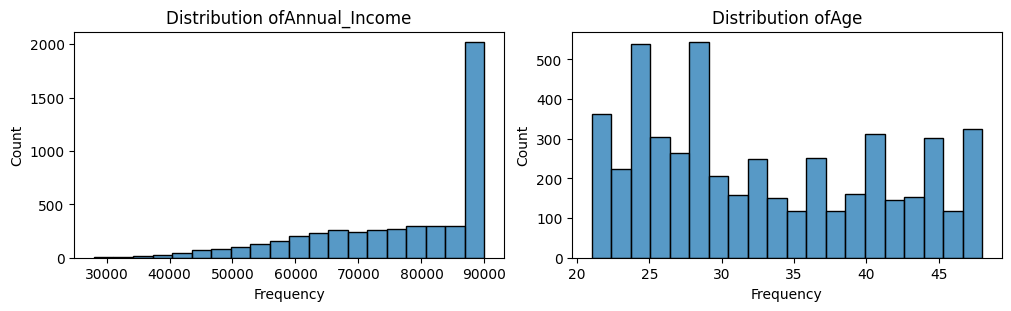

In [20]:
columns_age_income=['Annual_Income','Age']
fig,axs=plt.subplots(1,2,figsize=(10,3),constrained_layout=True)
for i,x in enumerate(columns_age_income):
    sns.histplot(data=dt,x=x,bins=20,ax=axs[i])
    axs[i].set_title(f"Distribution of{x}")
    axs[i].set_xlabel(f'{x}')
    axs[i].set_xlabel('Frequency')
plt.show()

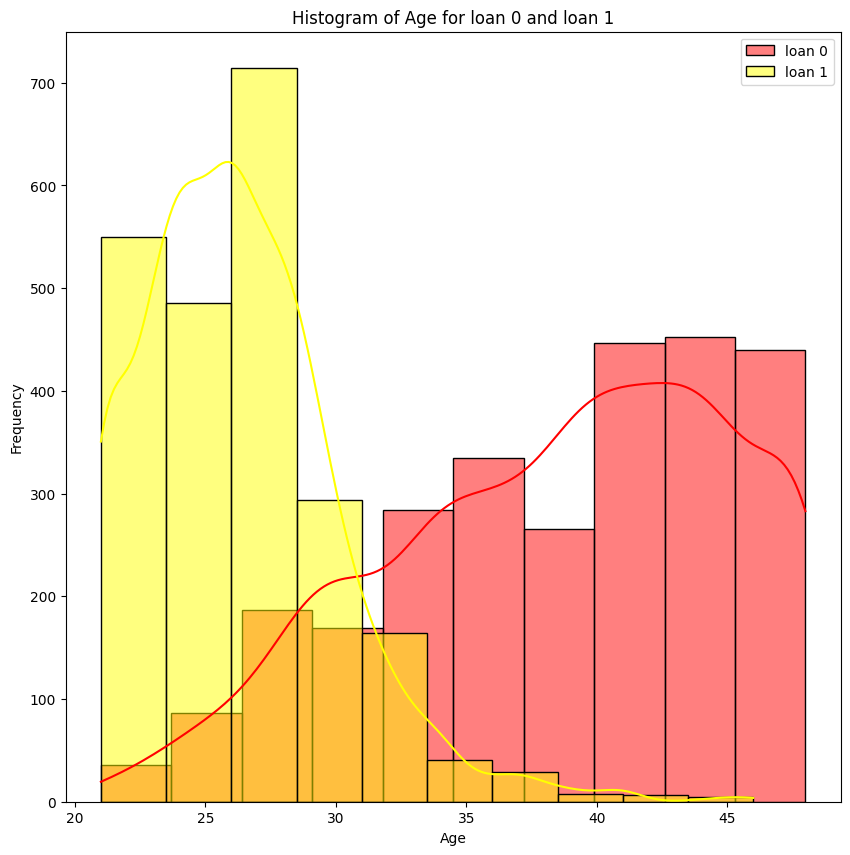

In [21]:
loan_0_age=dt[dt["Default"]==0]["Age"]
loan_1_age=dt[dt["Default"]==1]["Age"]
plt.figure(figsize=(10,10))
sns.histplot(loan_0_age,bins=10,color="Red",label="loan 0", kde=True)
sns.histplot(loan_1_age,bins=10,color="Yellow",label="loan 1", kde=True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age for loan 0 and loan 1")
plt.legend()
plt.show()


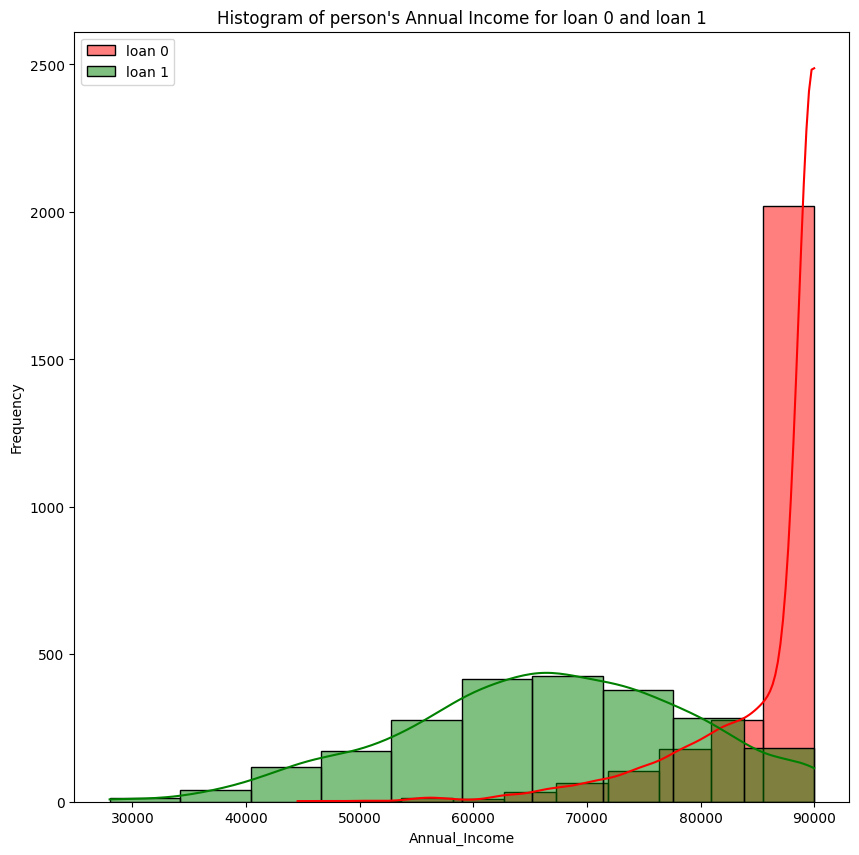

In [22]:
loan_0_age=dt[dt["Default"]==0]["Annual_Income"]
loan_1_age=dt[dt["Default"]==1]["Annual_Income"]
plt.figure(figsize=(10,10))
sns.histplot(loan_0_age,bins=10,color="Red",label="loan 0", kde=True)
sns.histplot(loan_1_age,bins=10,color="Green",label="loan 1", kde=True)
plt.xlabel("Annual_Income")
plt.ylabel("Frequency")
plt.title("Histogram of person's Annual Income for loan 0 and loan 1")
plt.legend()
plt.show()

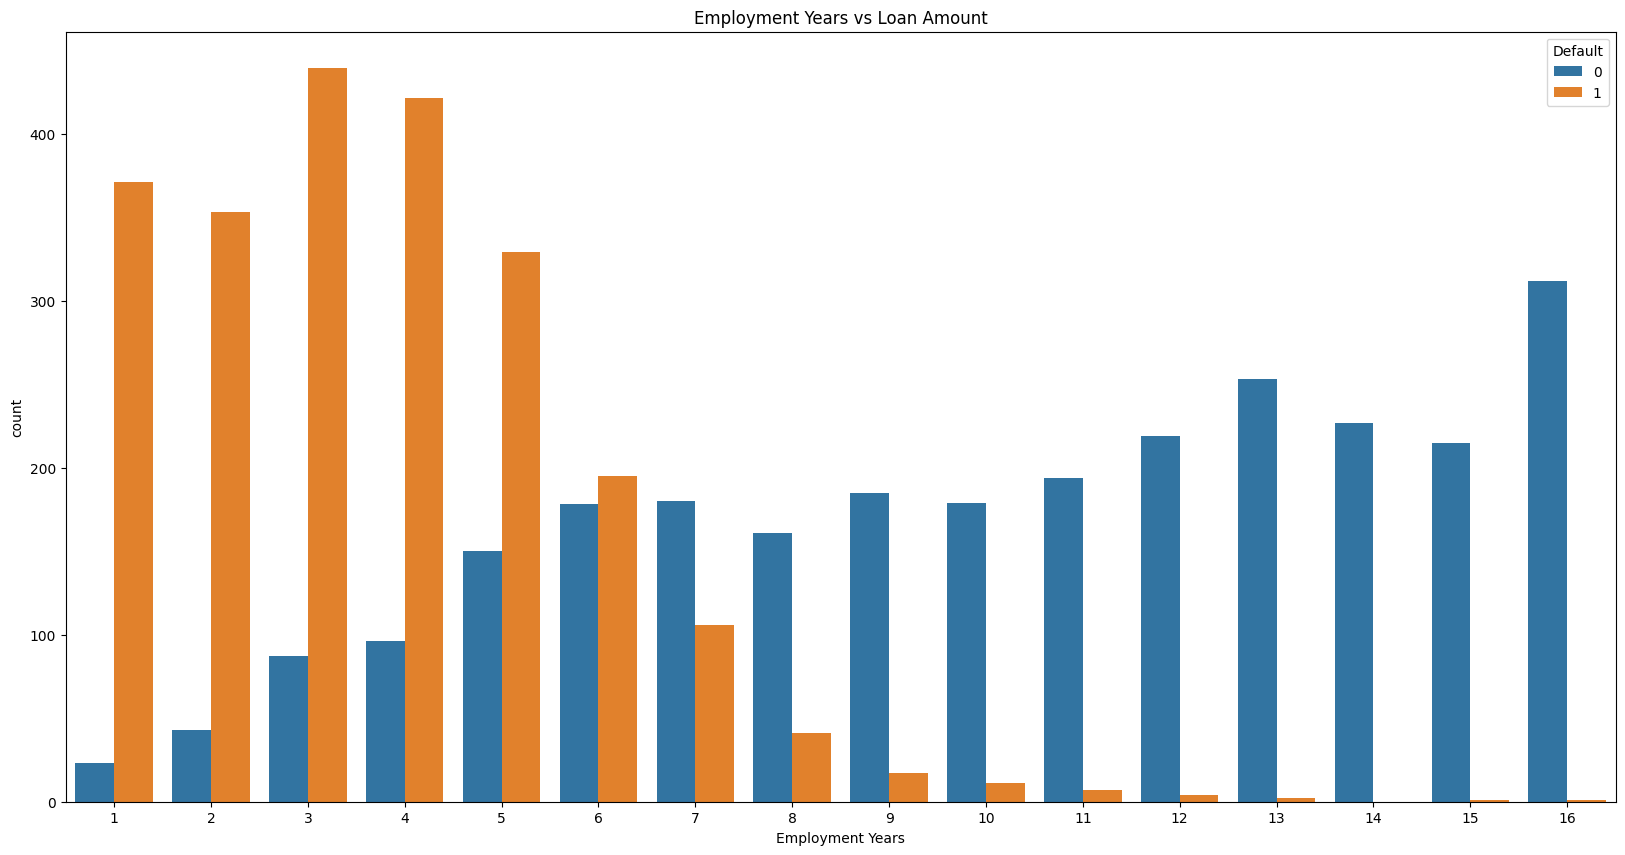

In [23]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Employment_Years',hue = 'Default', data=dt)
plt.title('Employment Years vs Loan Amount')
plt.xlabel('Employment Years')
plt.ylabel('count')
plt.show()

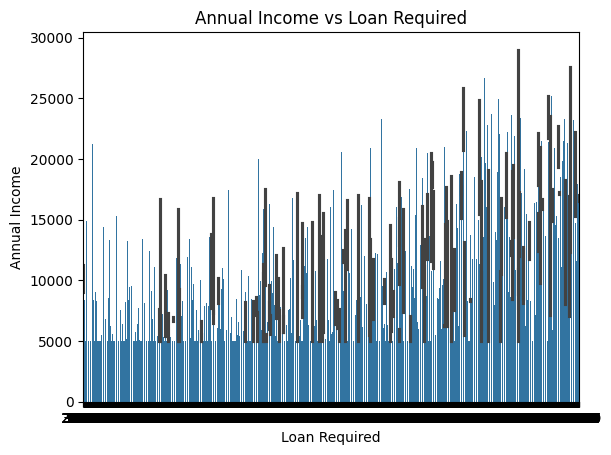

In [24]:
sns.barplot(x = 'Annual_Income' , y = 'Loan_Amount_Requested',data = dt)
plt.title("Annual Income vs Loan Required")
plt.xlabel("Loan Required")
plt.ylabel("Annual Income")
plt.show()

In [25]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [26]:
x=dt.drop(columns='Default',axis=1)
y=dt['Default']

In [27]:
x_train , x_test , y_train , y_test  = train_test_split(x,y,test_size = 0.2)
x_train.shape ,y_train.shape , x_test.shape ,y_test.shape

((4000, 6), (4000,), (1000, 6), (1000,))

In [28]:
x_train.head()

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested
3803,3,25,59630,591,6,5503
2762,35,28,69384,563,4,17185
3119,35,29,81756,609,15,15974
541,14,25,57878,608,3,5000
3820,1,25,84453,560,1,7934


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder,PolynomialFeatures
from sklearn.compose import ColumnTransformer

In [30]:
num_cols=['Applicant_ID','Age','Annual_Income','Credit_Score','Employment_Years','Loan_Amount_Requested']

In [31]:
num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy = 'mean')),
    #('poly', PolynomialFeatures(degree = 3)),
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler())
])

In [32]:
preprocessor = ColumnTransformer([('num_pipeline', num_pipeline, num_cols)]).set_output(transform = 'pandas')

In [33]:
x_train_prep = preprocessor.fit_transform(x_train)
x_test_prep = preprocessor.transform(x_test)

In [34]:
x_train_prep.head()

,num_pipeline__1,num_pipeline__Applicant_ID,num_pipeline__Age,num_pipeline__Annual_Income,num_pipeline__Credit_Score,num_pipeline__Employment_Years,num_pipeline__Loan_Amount_Requested,num_pipeline__Applicant_ID^2,num_pipeline__Applicant_ID Age,num_pipeline__Applicant_ID Annual_Income,...,num_pipeline__Annual_Income^2,num_pipeline__Annual_Income Credit_Score,num_pipeline__Annual_Income Employment_Years,num_pipeline__Annual_Income Loan_Amount_Requested,num_pipeline__Credit_Score^2,num_pipeline__Credit_Score Employment_Years,num_pipeline__Credit_Score Loan_Amount_Requested,num_pipeline__Employment_Years^2,num_pipeline__Employment_Years Loan_Amount_Requested,num_pipeline__Loan_Amount_Requested^2
3803,0.0,-1.557042,-0.964549,-1.283159,-0.838958,-0.273139,-1.115831,-1.177347,-1.482450,-1.542437,...,-1.327696,-1.229359,-0.558138,-1.135325,-0.848720,-0.382003,-1.086300,-0.484861,-0.727466,-0.909746
2762,0.0,0.939218,-0.598346,-0.578656,-1.339144,-0.700085,0.761493,0.920336,0.535551,0.669152,...,-0.691461,-0.908278,-0.742772,0.300348,-1.299392,-0.770251,0.332926,-0.733923,-0.388455,0.566319
3119,0.0,0.939218,-0.476278,0.314937,-0.517410,1.648120,0.566883,0.920336,0.613596,1.094864,...,0.253943,-0.007151,1.440335,0.489075,-0.547454,1.294905,0.344639,1.868774,1.233147,0.342685
541,0.0,-0.698953,-0.964549,-1.409701,-0.535274,-0.913558,-1.196665,-0.854759,-0.869245,-0.921690,...,-1.431783,-1.233686,-0.981840,-1.199704,-0.564428,-0.898667,-1.133205,-0.821095,-0.898462,-0.939168
3820,0.0,-1.713058,-0.964549,0.509733,-1.392735,-1.340505,-0.725164,-1.191147,-1.593942,-1.635280,...,0.480581,-0.216821,-1.187037,-0.567338,-1.346381,-1.277914,-0.823183,-0.920720,-0.965520,-0.727827


# Model Selection and Training

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,confusion_matrix
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV
import scipy.stats as stats

In [36]:
models = {
    'LogisticRegression': LogisticRegression(penalty = 'l2' , solver='lbfgs'),
    'SVC' : SVC(C = 1.0 , kernel= 'rbf' , gamma= 'scale'),
    'DecisionTreeClassifier' : DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, criterion='gini'),
    'RandomForestClassifier' : RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=2, criterion='gini'),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=2),
    'GaussianNB' : GaussianNB(var_smoothing=1e-9)
}

In [37]:
model_results = {}

for model_name, model in models.items():
    scores = cross_val_score(model, x_train_prep, y_train, cv=3, scoring='accuracy')
    model_results[model_name] = scores.mean()
    
print("\nFinal Results:")
for model_name, score in model_results.items():
    print(f'{model_name}: {score:.4f}')


Final Results:
LogisticRegression: 0.9640
SVC: 0.9648
DecisionTreeClassifier: 0.9482
RandomForestClassifier: 0.9660
KNeighborsClassifier: 0.9635
GaussianNB: 0.9588


In [38]:
sorted_results = sorted(model_results.items(), key=lambda x: x[1], reverse=True)
top_three_models = sorted_results[:3]
for model_name, score in top_three_models:
    print(f'{model_name}: {score:.4f}')

RandomForestClassifier: 0.9660
SVC: 0.9648
LogisticRegression: 0.9640


# Model Evaluation


Model: RandomForestClassifier
Accuracy Score: 0.9660

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       530
           1       0.96      0.97      0.96       470

    accuracy                           0.96      1000
   macro avg       0.96      0.97      0.96      1000
weighted avg       0.97      0.96      0.97      1000



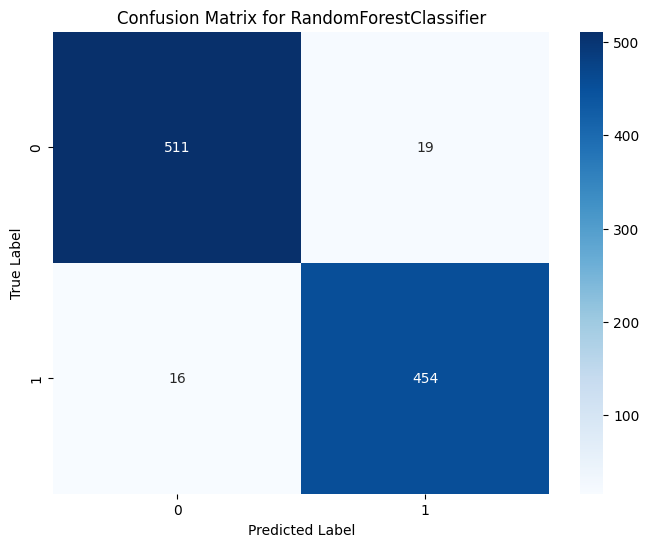


Model: SVC
Accuracy Score: 0.9648

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       530
           1       0.96      0.97      0.97       470

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



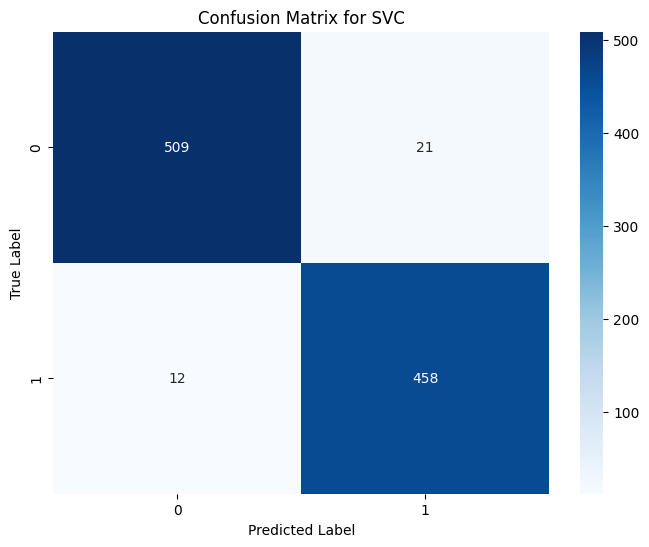


Model: LogisticRegression
Accuracy Score: 0.9640

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       530
           1       0.96      0.97      0.97       470

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



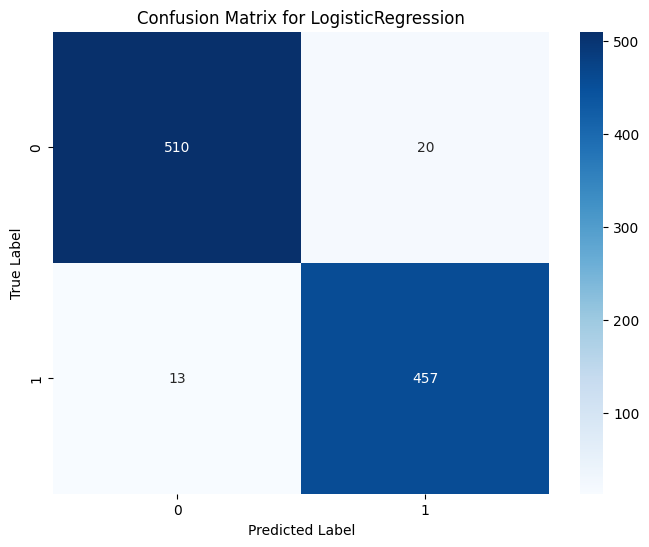

In [39]:
for model_name, score in top_three_models:
    print(f"\nModel: {model_name}")
    print(f"Accuracy Score: {score:.4f}")

    model = models[model_name]
    model.fit(x_train_prep, y_train)
    
    y_pred = model.predict(x_test_prep)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [40]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(model,file)